In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_excel("./dados bootcamp/HEART ATTACK/heart_train.xlsx")
df = df.astype('float64') # Scikit learn recomenda emprego de tipos float64
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,53.802885,0.677885,0.995192,131.634615,248.56250,0.134615,0.538462,149.326923,0.326923,0.979808,1.427885,0.697115,2.307692,0.538462
std,9.346502,0.468414,1.028566,17.050115,54.97743,0.342136,0.527927,23.141423,0.470221,1.055822,0.593517,1.026034,0.582796,0.499721
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,212.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.500000,1.000000,1.000000,130.000000,241.50000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,564.00000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


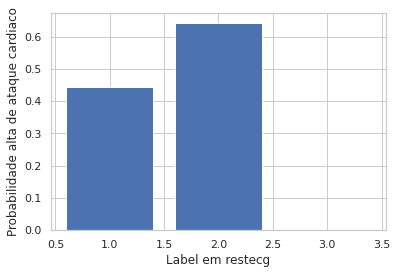

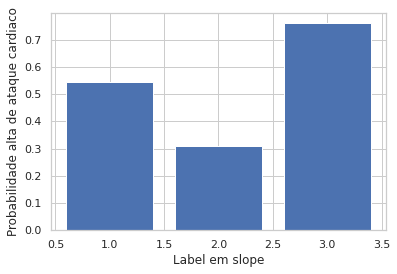

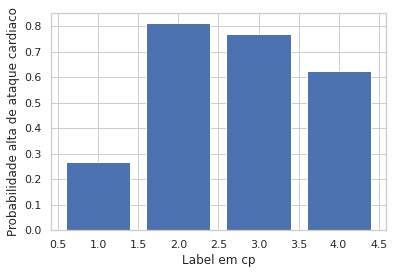

In [14]:
# Visializando os dados categóricos melhor

for category in ['restecg', 'slope']:
    data = []
    for i in range(3):
        df_cat = df.loc[ df[category] == i, ['target']]
        total = df_cat.shape[0]
        attack = df_cat[df_cat['target'] == 1].shape[0]
        data.append(attack/total)
    plt.bar([1, 2, 3], data)
    plt.xlabel(f"Label em {category}")
    plt.ylabel("Probabilidade alta de ataque cardiaco")
    plt.show()

data = []
for i in range(4):
    df_cat = df.loc[ df['cp'] == i, ['target']]
    total = df_cat.shape[0]
    attack = df_cat[df_cat['target'] == 1].shape[0]
    data.append(attack/total)
plt.bar([1, 2, 3, 4], data)
plt.xlabel("Label em cp")
plt.ylabel("Probabilidade alta de ataque cardiaco")
plt.show()


In [8]:
from sklearn.preprocessing import normalize

# Normalizando os dados para visualização
y = df.pop('target')
X = normalize(X, axis=0)

data = []
# Gerando correlações
for i in np.arrange(0.0, 1.0, 0.1):




In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression

# Carregando dataset
df = pd.read_excel("./dados bootcamp/HEART ATTACK/heart_train.xlsx")
df = df.astype('float64') # Scikit learn recomenda emprego de tipos float64

# Separando labels do target
y = df.pop('target')
X = df

# Normalizando os dados categóricos
df['restecg'] = df['restecg'] - 1
df['slope'] = df['slope'] - 1

# Normalizando os dados numéricos
X_norm = normalize(X, axis=0)
print(X_norm)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.6, random_state=0)

# Aplicando Regressão Logística
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)

regressor.score(X_test, y_test)

[[0.05079223 0.08421519 0.         ... 0.04485613 0.         0.08740748]
 [0.07237892 0.08421519 0.         ... 0.04485613 0.05598925 0.02913583]
 [0.05206203 0.         0.04850713 ... 0.08971226 0.         0.05827165]
 ...
 [0.09777504 0.08421519 0.         ... 0.08971226 0.16796775 0.05827165]
 [0.06983931 0.08421519 0.         ... 0.04485613 0.05598925 0.08740748]
 [0.0888864  0.08421519 0.09701425 ... 0.04485613 0.05598925 0.08740748]]


0.7261904761904762

In [10]:
regressor.coef_

array([[-0.1281821 , -0.52942547,  1.23287276, -0.06577823, -0.1629875 ,
         0.2251372 ,  0.22402182,  0.25289234, -1.28835583, -0.96223196,
         0.52696037, -0.74459338, -0.37064798]])